<a href="https://colab.research.google.com/github/Tverdostup1993/Python_for_ds_tasks/blob/main/%D0%A2%D0%B2%D0%B5%D1%80%D0%B4%D0%BE%D1%81%D1%82%D1%83%D0%BF_%D0%9E_%D0%86_%22HW_2_2_%D0%9F%D0%BE%D0%BB%D1%96%D0%BD%D0%BE%D0%BC%D1%96%D0%B0%D0%BB%D1%8C%D0%BD%D1%96_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8_Pipelines_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми проведемо додаткові експерименти для рішення задачі бінарної класифікації і створимо ваш новий submission на змагання на Kaggle.

-----------


**Завдання 0**. Завантажте дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle - шукайте посилання в уроці [Запрошення до участі у Kaggle-змаганні.](https://data-loves.kwiga.com/courses/machine-learning-dlia-liudei/domashnie-zavdannia-zmagannia-z-kaggle)  Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").


**Завдання 1**. **Збираємо весь код з попереднього ДЗ в одному місці.** В лекційному ноутбуці `Логістична регресія з ScikitLearn. Повна ML задача.ipynb` ми познайомились з поняттям пайплайнів, а також я показала, як компактно виглядає рішення МЛ задачі, якщо ми зберемо весь код разом.

Оскільки ми далі будемо робити експерименти, які включають ті самі етапи попередньої обробки, але інше моделювання - буде зручно мати весь код компактно і під рукою. Тому зараз ми займемось збором коду до купи :) Після цього завдання для подальших експериментів ви можете перенести частини розвʼязку взагалі в окремий `.py` файл, аби було зручно імпортувати функції.

Зі свого рішення в попередньому домашньому завданні (`Логістична регресія з scikit learn.ipynb`) зберіть усі кроки розвʼязку задачі разом з використанням `sklearn.Pipeline` за прикладом з лекції.

Ваш код нижче має містити
1. Читання даних з файлу (поза пайплайном).
2. Розбиття на тренувальний і валідаційний набори, де валідаційний містить 20% даних (поза пайплайном).
3. Виділення категоріальних і числових колонок (поза пайплайном).
4. Підготовку категоріальних і числових колонок (частина пайплайну). В прикладі в лекції ми оформлювали обробку числових і категоріальних колонок в окремі трансформери `numeric_transformer`, `categorical_cols`. Рекоемндую зробити саме так, так потім зручніше вносити зміни :)
5. Тренування лог регресії (частина пайплайну).
6. Запуск пайплайну на тренування на трен. даних (поза пайплайном).
7. Запуск пайплайну на передбачення на трен і вал. даних і вимір метрик якості ROC-AUC + вивдення Confusion Matrix (поза пайплайном).
8. Збереження моделі в формат joblib (поза пайплайном).

Ви це все вже зробили в попереднтьому ДЗ! Тож, тут просто заадча все зібрати разом.

Нижче я додала підказки, що покроково ви маєте зробити. Якщо ви почуваєтесь впевнено, можете видалити ці підказки і реалізувати все самостійно, або ж - просто заповнити пропуски.

Завдання оцінюється в 10 балів. Головний результат - аби код в фіналі був робочий. Бо за не робочий нам гроші ніхто не заплатить :)

In [ ]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
import seaborn as sns
import joblib

Area under ROC score on Train dataset: 0.90


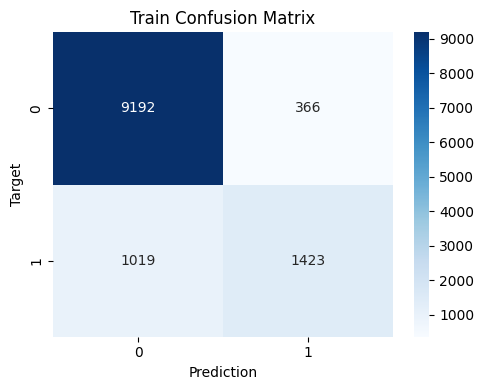

Area under ROC score on Validation dataset: 0.88


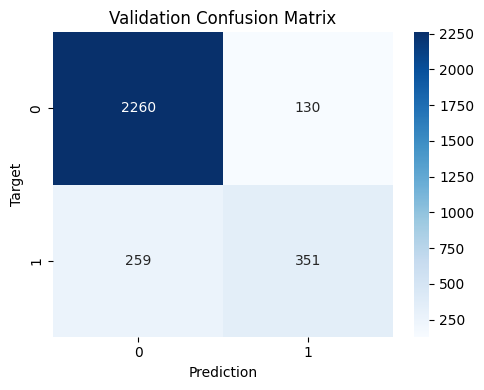

['logistic_regression_pipeline.joblib']

In [ ]:
raw_df = pd.read_csv('train.csv', index_col=0)

train_df, val_df = train_test_split(raw_df, test_size=0.2, random_state=42, stratify=raw_df['Exited'])

# Створюємо трен. і вал. набори
input_cols = list(train_df.columns)[1:-1]
target_col = 'Exited'
train_inputs, train_targets = train_df[input_cols], train_df[target_col]
val_inputs, val_targets = val_df[input_cols], val_df[target_col]

# Виявляємо числові і категоріальні колонки
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes(include='object').columns.tolist()

# Створюємо трансформери для числових і категоріальних колонок
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Комбінуємо трансформери для різних типів колонок в один препроцесор
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_cols),
    ('cat', categorical_transformer, categorical_cols)
])

# Стоврюємо пайплайн, який спочатку запускає препроцесинг, потім тренуєм модель
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=100, random_state=42))
])

# Тренуємо пайплайн
model_pipeline.fit(X_train, y_train)

# Функція, щоб передбачати і рахувати метрики
def predict_and_plot(model_pipeline, inputs, targets, name=''):
    proba_preds = model_pipeline.predict_proba(inputs)[:, 1]
    preds = model_pipeline.predict(inputs)

    roc_auc = roc_auc_score(targets, proba_preds)

    print(f"Area under ROC score on {name} dataset: {roc_auc:.2f}")

    confusion_matrix_ = confusion_matrix(targets, preds)
    plt.figure(figsize=(5, 4))
    sns.heatmap(confusion_matrix_, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title(f'{name} Confusion Matrix')
    plt.tight_layout()
    plt.show()

    return preds

# Оцінюємо модель на трен і вал даних
train_preds = predict_and_plot(model_pipeline, X_train, y_train, name='Train')
val_preds = predict_and_plot(model_pipeline, X_val, y_val, name='Validation')

# Зберігаємо модель для подальшого використання
joblib.dump(model_pipeline, 'logistic_regression_pipeline.joblib')


**Завдання 2**. Такс, у нас з вами є вже готовий пайплайн. Давайте проведемо нові експерименти.

  Додайте в попередню обробку числових колонок генерацію polinomal features до степені 2 включно. Для цього створіть новий препроцесор і створіть новий пайплайн.

  Запустіть пайплайн на тренування і виведіть метрики для тренувального і валідаційного набору. Напишіть, як вам модель? Чи спостерігається в цій моделі overfit чи underfit? Чи ця модель добре генералізує?

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
numeric_transformer_poly = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler())
])


In [ ]:
preprocessor_poly = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_poly, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

Area under ROC score on Train (poly) dataset: 0.94


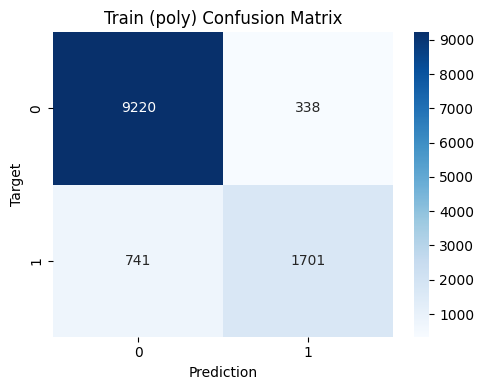

Area under ROC score on Validation (poly) dataset: 0.93


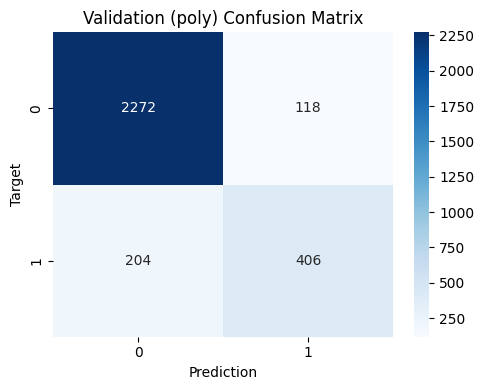

In [ ]:
model_pipeline_poly = Pipeline(steps=[
    ('preprocessor', preprocessor_poly),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
model_pipeline_poly.fit(X_train, y_train)

model_pipeline_poly.fit(X_train, y_train)

train_preds_poly = predict_and_plot(model_pipeline_poly, X_train, y_train, name='Train (poly)')
val_preds_poly = predict_and_plot(model_pipeline_poly, X_val, y_val, name='Validation (poly)')


Модель виглядає добре. Відсутній overfit чи underfit. Додавання поліноміальних ознак покращило представлення складніших взаємозв'язків між числовими фічами.

**Завдання 3**. Тепер давайте створимо ще новий пайплайн, тільки тепер поліноміальні ознаки згенеруємо до степені 4. Зробіть висновок про якість моделі. Якщо вам подобається резульат якоїсь з моделей в цьому ДЗ - рекомендую зробити submission в змаганні.

Area under ROC score on Train (poly) dataset: 0.95


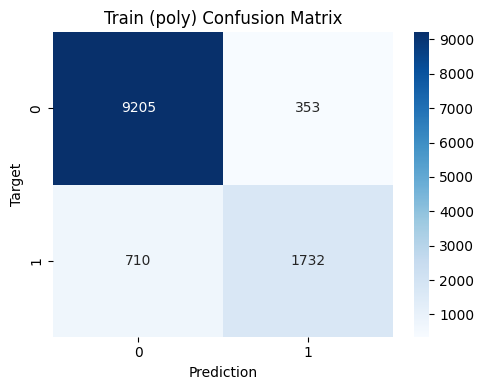

Area under ROC score on Validation (poly) dataset: 0.93


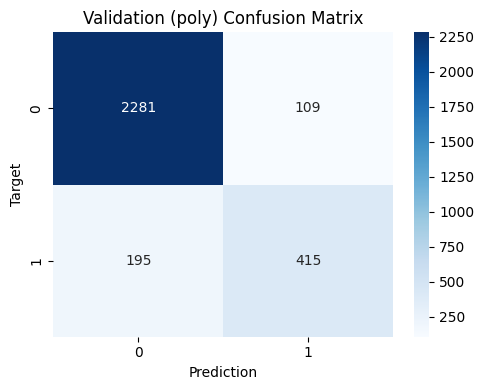

In [ ]:
numeric_transformer_poly3 = Pipeline(steps=[
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('scaler', StandardScaler())
])

preprocessor_poly3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer_poly3, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])
model_pipeline_poly3 = Pipeline(steps=[
    ('preprocessor', preprocessor_poly3),
    ('classifier', LogisticRegression(max_iter=500, random_state=42))
])
model_pipeline_poly3.fit(X_train, y_train)

train_preds_poly = predict_and_plot(model_pipeline_poly3, X_train, y_train, name='Train (poly)')
val_preds_poly = predict_and_plot(model_pipeline_poly3, X_val, y_val, name='Validation (poly)')


In [ ]:
test_df = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

test_ids = test_df['CustomerId']

X_test = test_df.drop(columns='CustomerId')

test_preds = model_pipeline_poly3.predict(X_test)

sample_submission['Exited'] = test_preds

print(sample_submission.head())

sample_submission.to_csv('submission_ poly.csv', index=False)


      id  Exited
0  15000     0.0
1  15001     0.0
2  15002     0.0
3  15003     1.0
4  15004     0.0


**Завдання 4. Перенавчання і регуляризація**.

  Скачайте набір даних `regression_data.csv`. Звичайте набір даних з `regression_data.csv`, розбийте на train і test (в тест 20%) і натренуйте модель лінійної регресії з масштабуванням числових ознак і поліноміальними ознаками до степені **5 включно**.

  Виміряйте якість прогностичної моделі і зробіть висновок, чи модель хороша, чи вона добре генералізує?


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('regression_data.csv')

X = df.drop(columns='target')
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

pipeline.fit(X_train, y_train)

y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Train RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")
print(f"Test RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

Train RMSE: 0.00, R²: 1.00
Test RMSE: 12.68, R²: 0.93


Модель з поліноміальними ознаками степеня 5 повністю "завчила" тренувальні дані (R² = 1.00, RMSE = 0.00), що вказує на перенавчання

**Завдання 5**. Натренуйте моделі Lasso(), Ridge(), ElasaticNet() на цих даних (з поліном ознаками до степені 20 включно), порівняйте якість з тою, яка була отримана з лінійною регресією. Яка модель найкраще генералізує і чому на ваш погляд (можливо треба буде для відповіді зробити додатковий аналіз ознак)?

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Створюємо пайплайн з поліноміальними ознаками до степені 20
def build_pipeline(model):
    return Pipeline([
        ('poly', PolynomialFeatures(degree=20, include_bias=False)),
        ('scaler', StandardScaler()),
        ('regressor', model)
    ])

# Список моделей
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.001, max_iter=10000),
    'ElasticNet': ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000)
}

# Словник для збереження результатів
results = {}

# Навчання та оцінка
for name, model in models.items():
    pipe = build_pipeline(model)
    pipe.fit(X_train, y_train)

    y_train_pred = pipe.predict(X_train)
    y_test_pred = pipe.predict(X_test)

    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    results[name] = {
        'Train RMSE': train_rmse,
        'Test RMSE': test_rmse,
        'Train R2': train_r2,
        'Test R2': test_r2
    }

# Вивід результатів
results_df = pd.DataFrame(results).T
results_df


,Train RMSE,Test RMSE,Train R2,Test R2
LinearRegression,5.665885e-12,65.391185,1.000000,-0.832785
Ridge,1.053670e+00,27.797604,0.999430,0.668802
Lasso,3.013396e-01,4.750285,0.999953,0.990328
ElasticNet,1.762035e-01,9.344720,0.999984,0.962571


Lasso показала найкращу якість передбачення на тестових даних. Таким чином, Lasso найкраще узагальнює дані у цій задачі.